<a href="https://colab.research.google.com/github/protocol-streams/research/blob/main/(Day2Night)pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive'

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [3]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=23e86a0cbd028e916bf23ec0c43e1741ad3c4a4b5632187eb2337af1a454b3fe
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=9bddf29854ecef58e77674274744d4cca8b83785f7c7c394c5ea01ac64f59633
  St

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh night2day

Specified [night2day]
for details.

--2023-06-20 20:45:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/night2day.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2063695642 (1.9G) [application/x-gzip]
Saving to: ‘./datasets/night2day.tar.gz’

/night2day.tar.gz    13%[=>                  ] 260.42M  3.59MB/s    eta 21m 29s^C


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_pix2pix_model.sh day2night

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [day2night]
for details.

--2023-06-20 20:48:48--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘./checkpoints/day2night_pretrained/latest_net_G.pth’

./checkpoints/day2n 100%[===================>] 207.62M  20.8MB/s    in 11s     

2023-06-20 20:49:00 (18.8 MB/s) - ‘./checkpoints/day2night_pretrained/latest_net_G.pth’ saved [217710797/217710797]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [5]:
!ls checkpoints/

day2night_pretrained  facades_label2photo_pretrained  facades_pix2pix


In [7]:
!python test.py --dataroot ./datasets/paris --direction BtoA --model pix2pix --name day2night_pretrained --gpu_ids 0 --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/paris              	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
#!python test.py --dataroot ./datasets/facades/testB/ --name facades_pix2pix --model test --netG unet_256 --direction BtoA --dataset_mode single --norm batch

# Visualize

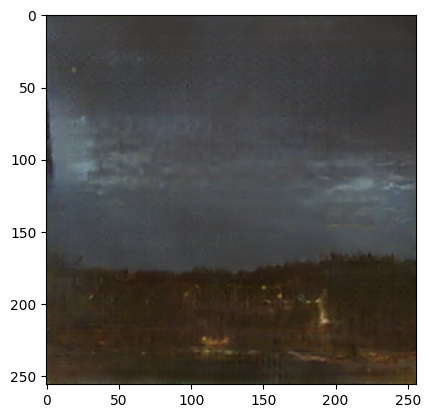

In [8]:
import matplotlib.pyplot as plt

img = plt.imread('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/day2night_pretrained/test_latest/images/frame-0027_fake_B.png')
plt.imshow(img)

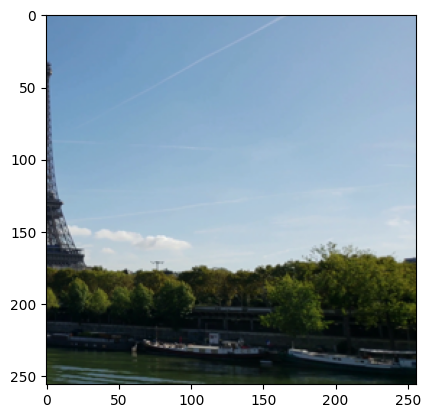

In [9]:
img = plt.imread('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/results/day2night_pretrained/test_latest/images/frame-0027_real_A.png')
plt.imshow(img)

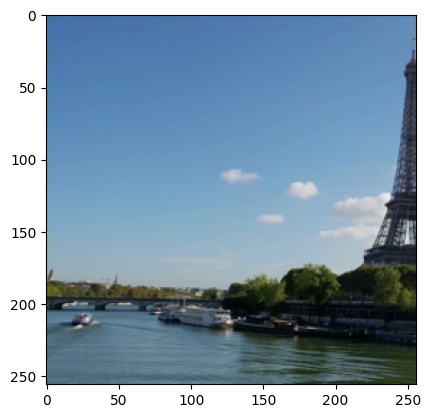

In [10]:
img = plt.imread('./results/day2night_pretrained/test_latest/images/frame-0027_real_B.png')
plt.imshow(img)